# 2 - Engenharia de Golems

Para esse capítulo teremos dois objetivos:
    
`1. Construir a intuição de como a atualização funciona, ou seja, como os Golems aprendem com a experiência.`
    
`2. Dar uma intuição sobre como construir esses modelos.`

Como iremos usar a probabilidade para fazer um típico modelo estatístico?

1. **Design o modelo**: Usando uma base científica e procurando de onde os dados nascem.


2. **Condicionar aos dados**: Atualização dos modelos com os dados. Na atualização bayesiana temos apenas um modo de fazer isso, pois há apenas um tipo de estimador bayesiano.


3. **Avaliar como está o modelo**: Temos que ser críticos com os nosso modelo quando por causa da distinção entre o pequeno mundo de Colombo e o *Mundo Real*.

Exemplo: Mostar como é feito o processo de criação dos dados. 

No curso foi lançado o Globo Terrestre para os alunos, e com a mão direita que cada aluno pegou o globo , deveria observar se o seu indicador estava sobre algum dos oceanos ($W$) ou sobre a terra ($L$)?

Suponha que a partir dos lançamentos, nós obtemos a sequência:

$$ [W, L, W, W, W, L, W, L, W] $$

O que iremos fazer aqui é estimar `a proporção da superfície da Terra que contém água`.

<img src="./images/earth.jpg" width=1000>

---

*Para pensar: qual é o número de vezes que precisamos jogar o globo, para obter uma certa precisão da estimativa da proporção de água na superfície do planeta?*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
 # Alterando a cor de fundo, para ficar mais elegante.
plt.rcParams['axes.facecolor'] = 'lightgray' 

In [3]:
# Design do Modelo

amostras = ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L']

amostras = [1 if amostra == 'W' else 0 for amostra in amostras]  # Transformando os dados em números.

Quando o globo foi lançado, a probabilidade do dedo indicador "cair na água", em qualquer um dos lançamentos, deveria ser proporcional a proporção de água que tem a superfície do planeta. Isso é como jogar uma moeda para sortear cara ou coroa. O ambiente é deterministico, porém caótico para nós. Assim, pequenas diferenças nas condições iniciais, geram resultados essencialmentes aleatórios.

Para nós, na escala do ambiente em que vivemos, o ambiente é deterministico, mas é um sistema caótico e, portanto, aleatório, pois somos seres que não conseguimos compreender o sistema e por isso somos ignorantes. Por isso que o lançamento de moedas, para nós, é um bom sistema de aleatorização, pois não podemos medir a velocidade inicial e a posição do giro bem o suficiente para prever como vai cair, essa é a única razão! 

Então dizemos que há um número aleatório que gerado, mas que a proporção dele deve ter uma probabilidade $p$ de ser água. 

Onde $p$ é a proporção de água que contém na superfície da Terra. Por isso não importa a ordem dos lançamento, já que a probabilidade se mantém a mesma durante todo os processo.

Essa é uma suposição e precisamos demostrar isso e sermos críticos com relação a isso. Em capítulos futuros iremos demostrar como fazer um cálculo para inspecionar essa suposição.

Esse é um dos exemplos mais simples que podemos iniciar nossa apresentação de como construir um modelo bayesiano. 

Em comparação com o exemplo anterior da bolsa que contém quarto bolinhas coloridas, agora, esse exemplo pode ser imaginado também como uma bolsa (ou seja, o *planeta* é uma bolsa) e que contém uma quantidade `infinitas bolinhas` (todo o par de *latitude* e *longitute* é representando como uma bolinha dentro da bolsa). E, assim como na bolsa, o planeta tem dois tipos de bolinhas coloridas: bolas $Azuis$ e bolas $Brancas$, ou melhor, `Água (W)` e `Terra (L)`, 

## Codicionando o modelo aos dados

- A atualizaçao bayesiana define o processo de aprendizagem ótima no *pequeno mundo*, convertendo assim a priori em posteriori.

- Dar ao Golem uma informação sobre o estado, antes dos dados: Aqui, uma crença inicial em cada possível valor de $p$ entre $0$ e $1$.

- Condicionar os dados para atualizarmos o estado da informação: Uma nova confiança em cada valor de $p$, condicionado nos dados.

Basicamente iremos atualizar a informação cortando todas as possibilidades que são impossíveis acontecer dado os dados e, depois, contar todas as outras possibilidades.

Assim como no exemplo da bolsa com as bolinhas, temos que colocar nossas hipóteses para conseguir avaliar quais delas são as mais plausíveis.

Para entermos melhor, vamos pensar em alguns hipóteses que são mais razoáveis:


$$\mbox{Hipótese 1 :   } p = 0.50$$


$$\mbox{Hipótese 2 :   } p = 0.60$$


$$\mbox{Hipótese 3 :   } p = 0.70$$


$$\mbox{Hipótese 4 :   } p = 0.80$$


$$\mbox{Hipótese 5 :   } p = 0.90$$



Podemos fazer as contagens na mão para todas as $5$ hipóteses propostas, assim como nós fizemos no exemplo das bolinhas na bolsa. Agora, pare um pouco, e realmente tire um tempo para refletir sobre o que estamos fazendo até agora. 



*Sério! Não vá adiante sem compreender qual é a semelhança entre os dois exemplos!*


Uma das perguntas que pode (e deveria ter surgido na sua mente) é:

- Por que foi escolhido essas cinco hipóteses?

- Poderiamos ter escolhido $p = 0.65$ ou $p = 0.67$ ou ainda $p = 0.6211$ ?

Sim, agora que você entendeu o exemplo com as $5$ hipóteses, podemos colocar outras hipóteses? 


Quais outras podemos colocar?

$$Todas!$$


Iremos colocar *todas computacionamente*, todos os números que estão entre $0$ e $1$.

Segue abaixo um gráfico das nossas crenças iniciais, da proporção de água na superfície da terra, para cada uma das hipóteses.

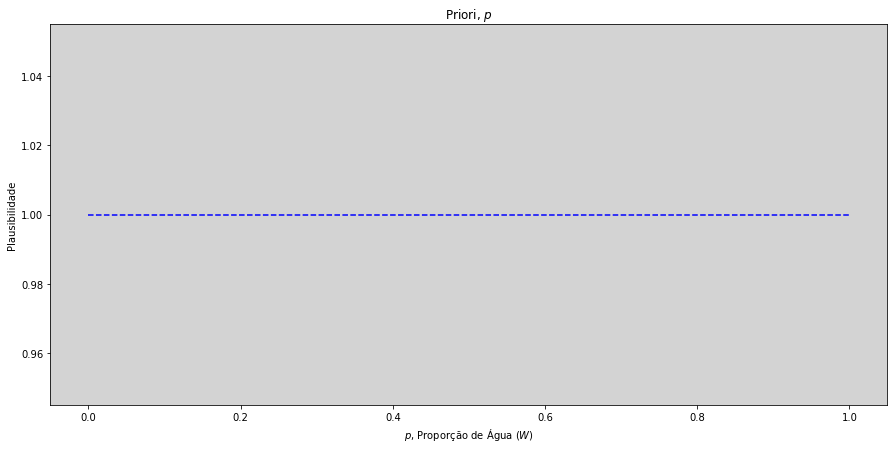

In [4]:
# A primeira hipóteses sobre a proporção de água sobre a superfície da Terra.
p_s = np.arange(0, 1 + 0.01, 0.01)  # 0.01 é um ajuste para o vetor de p_s = [0, 1] 

# Construindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0, scale=1)  # uniforme(0, 1)

# Plotando à priori, isto é, nossa crença inicial sobre a proporção de água na superfície da Terra.

plt.figure(figsize=(15, 7))
plt.plot(p_s, priori, ls='--', color='blue')  # Plot da priori

plt.title("Priori, $p$")
plt.xlabel('$p$, Proporção de Água ($W$)')
plt.ylabel('Plausibilidade')

plt.grid(ls='--', color="lightgray", axis="x")

plt.show()

Antes de lancarmos o globo para obtermos nossas amostras, iremos inserir no modelo nossa informação *à priori* sobre cada uma das hipóteses ($p$) que discutimos anteriormente.

*À priori* iremos considerar que todos os valores são igualmentes plausíveis para todos os possíveis valores de $p$. Isto é, a linha tracejada no gráfico acima nos indica, todos os valores entre $0$ e $1$ tem a mesma plausibilidade de ocorrer.  

*Obs: Podemos imaginar que o nosso modelo servirá para qualquer um dos planetas no Universo, não apenas na Terra.*

**Condições para esse Golem funcionar**

- A ordem dos dados é irrelevante, pois o Golem assume que a ordem é irrelevante.

    - Todos de uma só vez,
    - Um por vez ou
    - Em ordem embaralhada, nos darão a mesma posteriori como resultados.
    
    
- Toda a posteriori será a priori para a próxima observação.

- Cada priori é a posteriori de alguma outra inferencia.

- O "*efeito*" do tamanho da amostra está automaticamente incorporado na posteriori. 
    


### Criticando o modelo

Agora temos que sair do *pequeno mundo* e fazer as inferências no *mundo real*. Devemos, com isso, sermos críticos com as características do modelo e dos dados. O *pequeno mundo* não é igual ao mundo real, portanto haverá divergências e devemos estar ciente e atentos para entender e reavaliar o modelo e os dados. Como por exemplo:


- Temos que observar como é feita a coleta dos dados e se pode existir algum viés nesse processo: como pessoas daltonicas ver cores diferentes no globo; se algum país tem a cor azul; 

- Inferência bayesiana: Resposta lógica para a questão que estamos modelando:


 - *O quão plausível é cada proporção de água, dado os dados?* 
 
 
- O Golem deve ser supervisionado:


    - Golem apresenta mal funcionamento?

    - As respostas do Golem fazem sentido para o estudo em questão?

    - A questão que está sendo feita faz sentido?

    - Checar se mudanças nas suposições do modelo alteram a sensibilidade do modelo? 

### Construindo o framework de causalidade

<img src="./images/casuality_proportional_water.png" alt="causal structure" width=400 />

[Statistical Rethinking Course](https://youtu.be/XoVtOAN0htU?t=1332)

Existe uma relação causal na estrutura na qual os dados são coletados, $W$ depende apenas de $N$ e de $p$. Mas o $N$, que siginifica a quantidade de amostras que coletamos, é independente tanto da proporção de água ($p$) quanto do número de amostras de água que foram coletadas.

Entretanto, temos que $N$ e $W$ são variáveis que observamos, e $p$ a variável não-observada e que será inferida através das outras duas variáveis obsevadas pelo modelo. 

Com a mesma estrutura podemos, e faremos mais adiante, a inferência sobre a quantidade de vezes que o globo foi lançado ($N$). Esse é chamado **modelo de captura-recaptura**, estudado em ecologia e em epidemiologia.

 

<img src="./images/mark_recapture.jpeg" alt="Recapture" width=800>

----
*Mais informações sobre acesse:*

* [Wikipedia - Captura-Recaptura](https://en.wikipedia.org/wiki/Mark_and_recapture)

* [Wikipedia - Tratamento Estatístico](https://en.wikipedia.org/wiki/Talk:Mark_and_recapture#Statistical_treatment)

#### Definição de *W*:

- É o número relativos (proporcionais) de maneiras na quais podemos ver *W*, dado $N$ e $p$.


- **Objetivo**: Uma função matemática que atribui um número relativo de maneiras pelas quais veremos o valor específico de *W*, sem que precisarmos de construir todas as infinitas contagens relativas manualmente.


- **Resposta**: Distribuição de probabilidade.

Para começar, vamos supor que coletamos 3 amostras:

$$[W, L, W]$$

Qual é o número relativo (ou seja, proporcional) de maneiras de vermos essa sequência de amostras, dado algum valor de $p$.

Não sabemos qual é o valor de $p$, iremos dar qualquer valor de $p$ que esteja entre $0$ e $1$.

Assim, temos uma chance $p$ de obter o primeiro valor igual a $W$ e $(1-p)$ de obter $L$.

Multiplicaremos todas as proporções, pois os dados são independentes, pela teoria temos que probabilidades independentes são multiplicadas pela regra do produto.

E por que multiplicamos? Multiplicamos pois é a maneira rápida de contar todas as possibilidades pela bifurcação que o dados podem fazer. Nada mais é um modo mais rápido de contar todas as possibilidades:

Por exemplo:

$$ 5 \times 3 = 5 + 5 + 5 $$

*TODO: Ver um exemplo melhor para entender como isso se aplica nas probabilidades*


Assim, teremos: 

$$ [W, L, W] \rightarrow p \times (1-p) \times p$$

$$  = p^2 \times (1-p)^1 $$

Perceber também que nossa amostra poderá vir em duas outras sequências diferentes, e que não mudará o resultado.

$$ [W, W, L] \rightarrow p \times p \times (1-p) $$

$$ [L, W, W] \rightarrow (1 - p) \times p \times p $$

Com isso, precisamos também contar todas as ordens possíveis de colertmos uma amostra com *dois* $W$ e *uma* $L$.

Então, nesse caso particular, a contagem relativa de maneiras de se obter essa amostra é:

$$ 3 \times p^2 \times (1-p)^1 $$

#### Distribuição de W (*Verossimilhanças*)

E nessa fórmula, se extrapolarmos a para uma sequência de qualquer comprimento ($N$), chegaremos a conhecida `Distribuição Binomial`.

$$ P\{W | N, p\} = \frac{N!}{W! (N-W)!}  p^W  (1 - p)^{(N - W)} $$

A contagem dos $W$ é *distribuída binomialmente*, e com probabilidade $p$ iremos sortear um $W$ de um total de $N$ amostras.

In [5]:
# Python Code - 2.2

# pmf
# Probability Mass Function = Função de massa de probabilidade

stats.binom.pmf(6, n=9, p=0.5)  

0.16406250000000003

### Probabilidade *Priori* $p$

- É o que o nosso golem acredita antes de '*ver* ' os dados.


- Nessa caso é igual a probabilidade a priori uniforme $0-1$.


- $P\{W\}$ e $P\{p\}$ define nossa distribuição preditiva *à priori*.

*Preditiva* está relacionada com a ação de afirmar antecipadamente o que poderá ocorrer num momento futuro. Deduzido ou entendido a partir de informações, dados ou ações anteriores à finalização.*

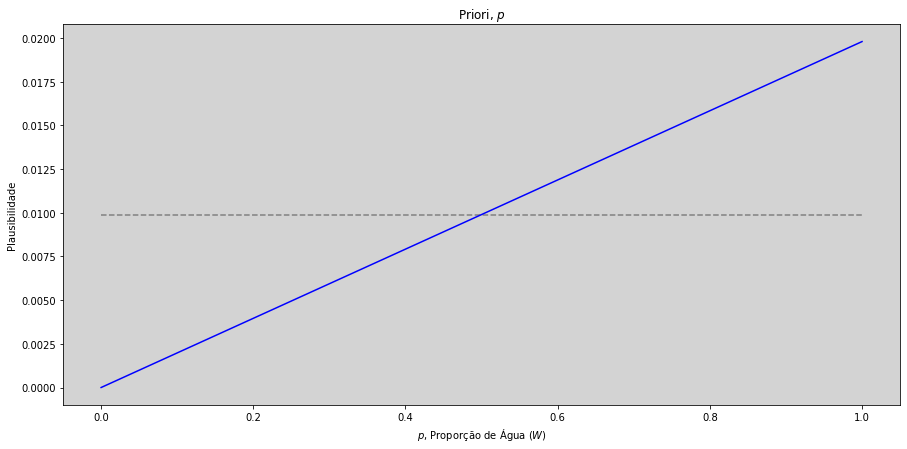

In [6]:
# A primeira hipóteses sobre a proporção de água sobre a superfície da Terra.
p_s = np.arange(0, 1 + 0.01, 0.01)  # 0.01 é um ajuste para o vetor de p_s = [0, 1] 

# Construindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0, scale=1)  # uniforme(0, 1) 

# Amostra.
amostras = ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L']

# Transformando nossa amostra em valores numericos.
amostras_num = [1 if amostra == 'W' else 0 for amostra in amostras] 

# Calculando a verosimilhança para todas nossas hipóteses de proporções de água para a primeira amostra.
N = 1  # É a variável que determina o tamanho da amostra que estamos utilizando no momento.

verossimilhanca_1 = stats.binom.pmf(np.sum(amostras_num[0: N]),  # Qtd de '1' na amostra.
                                    N,  # N é o número de amostras que estamos retirando.
                                    p=p_s)  # É o vetor de probabilidades, nossas hipóteses.

# Calculando a posteriori.
posteriori = verossimilhanca_1 * priori

# Gerando o gráfico com a priori x primeira amostra
plt.figure(figsize=(15, 7))

plt.plot(p_s, priori / sum(priori), ls='--', color='gray')

plt.plot(p_s, posteriori / sum(posteriori), color='blue')

plt.title('Priori, $p$')
plt.xlabel('$p$, Proporção de Água ($W$)')
plt.ylabel('Plausibilidade')

plt.grid(ls='--', color="lightgray", axis="x")

plt.show()

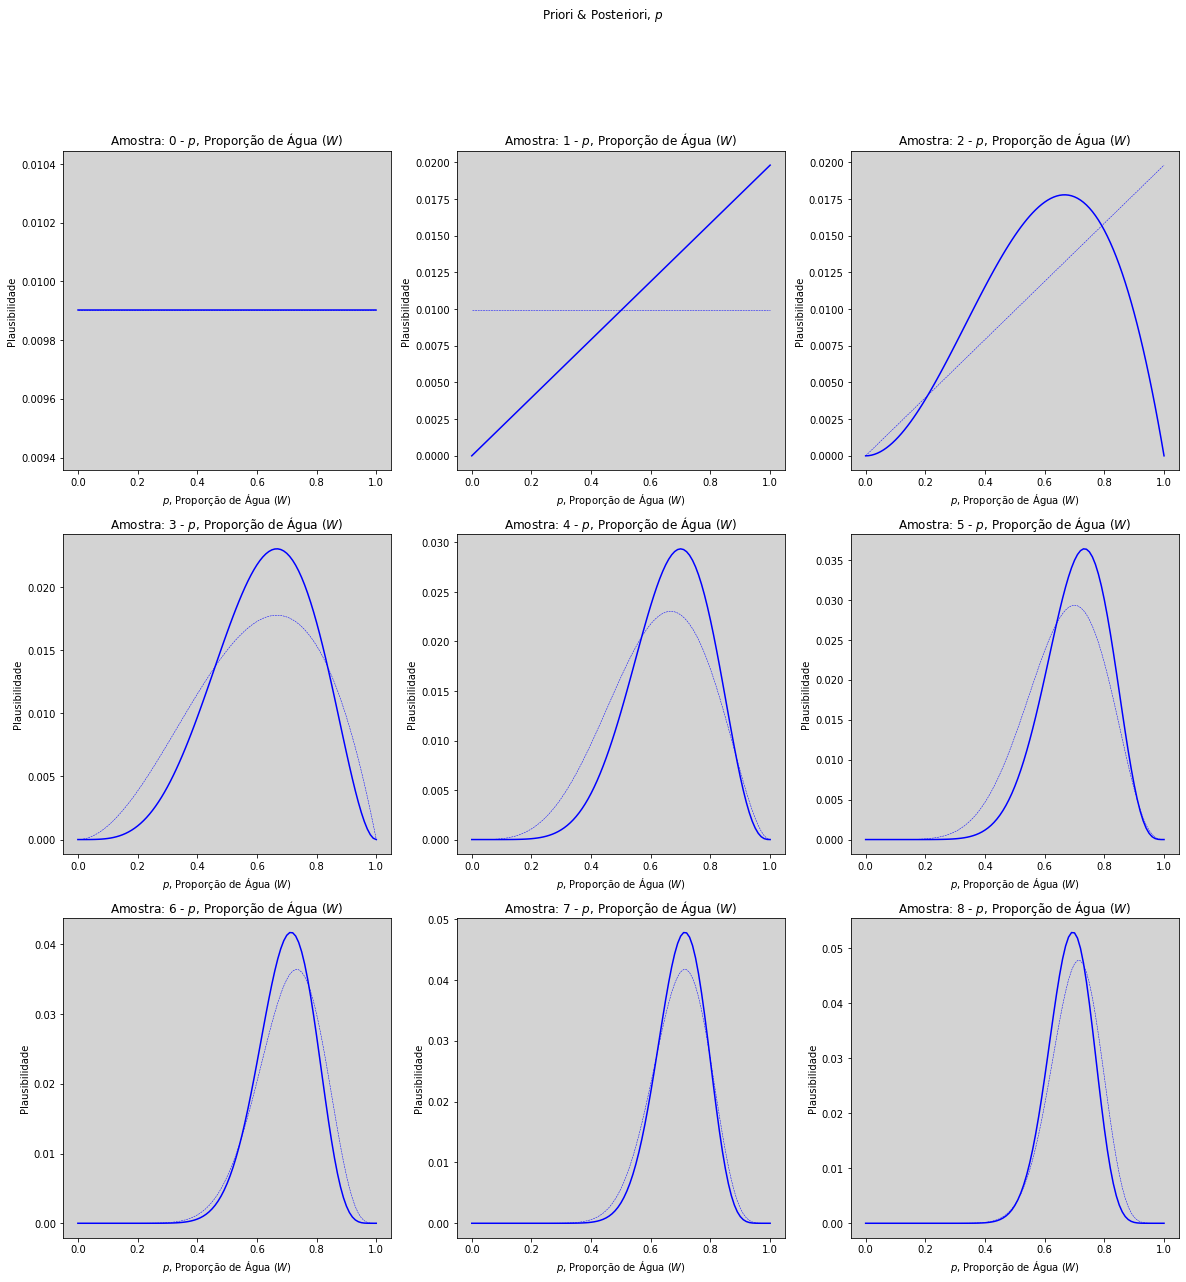

In [7]:
# Gerando todas as hipóteses sobre a proporção de água sobre a superfície da Terra.
precisao_grid = 100 # Precisão do Grid - Número de hipótese que estamos testando. Grid Aproximation

p_s = np.arange(0, 1 + 1/precisao_grid, 1/precisao_grid)  # 0.01 é um ajuste para o vetor de p_s = [0, 1] 

# Construindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0, scale=1)  # uniforme(0, 1) 

# Amostra.
amostras = ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W']

# Transformando nossa amostra em valores numericos.
amostras_num = [1 if amostra == 'W' else 0 for amostra in amostras] 


# (Configurações técnicas para a plotagem dos gráficos).
_lado = int(np.round(np.sqrt(len(amostras))))

fig, ax = plt.subplots(_lado, _lado, figsize=(20, 20))  # Constrói um grade quadrada para alocar os gráficos gerados. 

posicao = [[i, j] for i in range(_lado) for j in range(_lado)]  # Gera todas as posicões da grade.

# Gerando uma posteriori para cada uma das hipóteses.
for n in range(len(amostras)):
    
    # Calculando a verosimilhança para todas nossas hipóteses de proporções de água para a primeira amostra.
    N = n  # É a variável que determina o tamanho da amostra que estamos utilizando no momento.

    verossimilhanca = stats.binom.pmf(np.sum(amostras_num[0: N]),  # Qtd de '1' na amostra.
                                        N,  # N é o número de amostras que estamos retirando.
                                        p=p_s)  # É o vetor de probabilidades, nossas hipóteses.

    posteriori = verossimilhanca * priori  # Calculando a posteriori.
    
    ax[posicao[N][0], posicao[N][1]].plot(p_s, priori / sum(priori), 
                                          color='blue', ls='--', linewidth=0.5)  # Plot da Priori

    ax[posicao[N][0], posicao[N][1]].plot(p_s, posteriori / sum(posteriori), 
                                          color='blue')  # Plot da Posteriori

    ax[posicao[N][0], posicao[N][1]].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.
    
    ax[posicao[N][0], posicao[N][1]].set_title('Amostra: ' + str(N) + ' - $p$, Proporção de Água ($W$)')
    ax[posicao[N][0], posicao[N][1]].set_xlabel('$p$, Proporção de Água ($W$)')
    ax[posicao[N][0], posicao[N][1]].set_ylabel('Plausibilidade')    
    
    priori = posteriori  # Posteriori se torna à priori para a análise seguinte.

    
fig.suptitle('Priori & Posteriori, $p$')
    
plt.show()

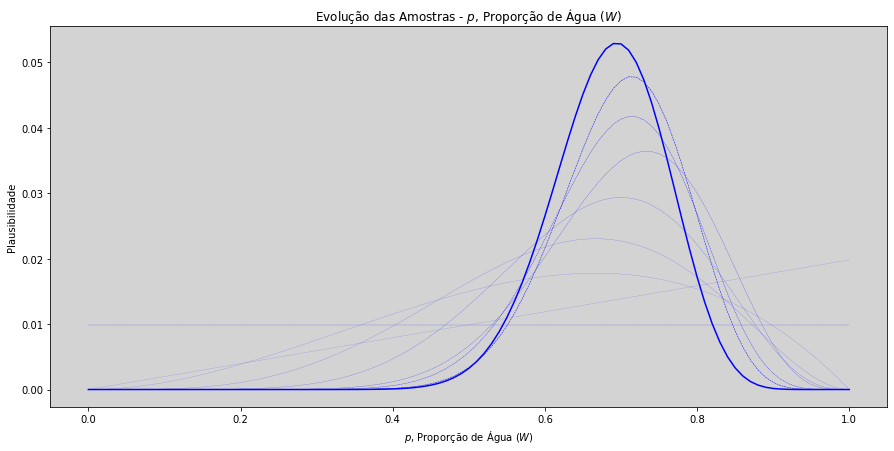

In [8]:
# Gerando todas as hipóteses sobre a proporção de água sobre a superfície da Terra.
p_s = np.arange(0, 1 + 0.01, 0.01)  # 0.01 é um ajuste para o vetor de p_s = [0, 1] 

# Construindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0, scale=1)  # uniforme(0, 1) 

# Amostra.
amostras = ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W']

# Transformando nossa amostra em valores numericos.
amostras_num = [1 if amostra == 'W' else 0 for amostra in amostras] 


# (Configurações técnicas para a plotagem dos gráficos).
plt.figure(figsize=(15, 7))

# Gerando uma posteriori para cada uma das hipóteses.
for n in range(len(amostras)):
    
    # Calculando a verosimilhança para todas nossas hipóteses de proporções de água para a primeira amostra.
    N = n  # É a variável que determina o tamanho da amostra que estamos utilizando no momento.

    verossimilhanca = stats.binom.pmf(np.sum(amostras_num[0: N]),  # Qtd de '1' na amostra.
                                        N,  # N é o número de amostras que estamos retirando.
                                        p=p_s)  # É o vetor de probabilidades, nossas hipóteses.

    posteriori = verossimilhanca * priori  # Calculando a posteriori.
    
    plt.plot(p_s, priori / sum(priori), color='blue', ls='--', linewidth=1/(len(amostras) - n + 1))  # Plot da Priori

    priori = posteriori  # Posteriori se torna à priori para a análise seguinte.

plt.plot(p_s, posteriori / sum(posteriori), color='blue')  # Plot da Posteriori
 
plt.grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.

plt.title('Evolução das Amostras - $p$, Proporção de Água ($W$)')
plt.xlabel('$p$, Proporção de Água ($W$)')
plt.ylabel('Plausibilidade')   
    
fig.suptitle('Priori & Posteriori, $p$')
    
plt.show()

### Para melhorar a comunicação, vamos utilizar a seguinte notação:

- Dizemos que a variável W é distribuída binomialmente:

$$W \sim binomial(N, p)$$


- Dizemos que a variável p é distribuída uniformemente:

$$p \sim uniform(0, 1)$$

### Probabilidade a posteriori

- A estimativa bayesiana é sempre uma distribuição sobre os parâmetros, $P\{ parametros | dados\}$:

$$ P\{p | W, N \} $$


O cálculo via o teorema de bayes:


$$ P\{ p | W, N \} = \frac{ P\{W | N, p\} \times P\{ p \} } {\sum P\{W | N, p \} P\{p\}, \forall p }  $$

onde ($\forall p$) significa *para todo os $p$'s*.

$$ \mbox{Posteriori} = \frac{\mbox{Probabilidade das variáveis observadas } \times \mbox{Priori}} {\mbox{Constante de Normalização}}  $$


### Posteriori, Priori e Verossimilhança

Observamos no gráfico abaixo qual o comportamento da posteriori quando escolhemos diferentes prioris para $p$. 

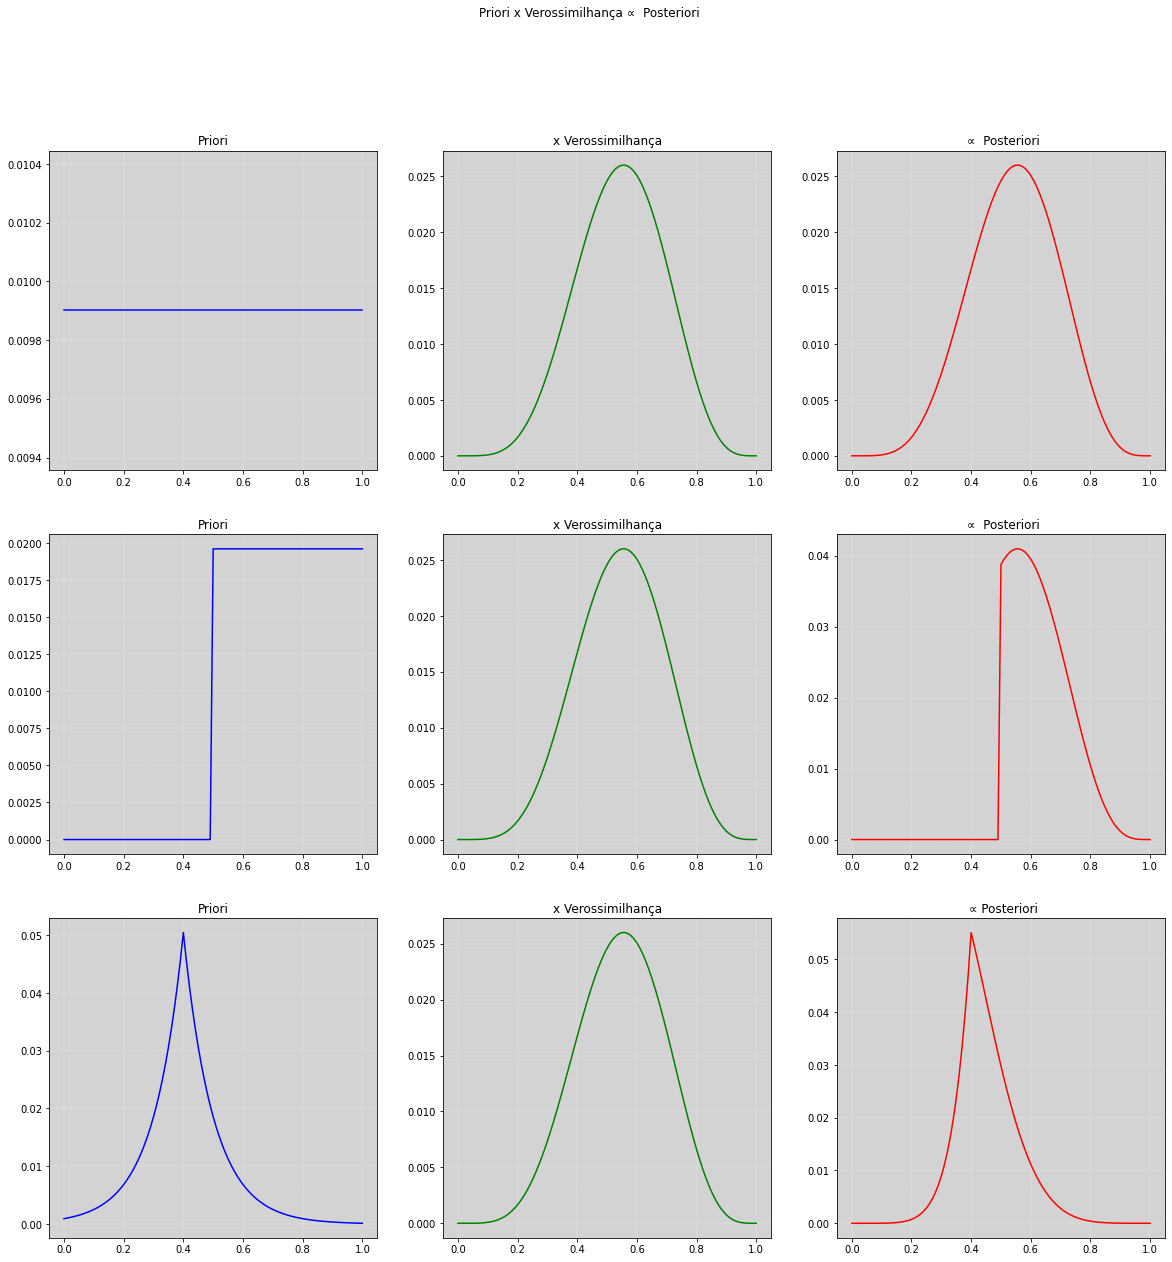

In [9]:
# Gerando todas as hipóteses sobre a proporção de água sobre a superfície da Terra.
p_s = np.arange(0, 1 + 0.01, 0.01)  # 0.01 é um ajuste para o vetor de p_s = [0, 1] 

# Amostra.
amostras = ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W']

# Verossimilhanças de todas as amostras.
verossimilhanca = stats.binom.pmf(np.sum(amostras_num[0: N]),  # Qtd de '1' na amostra.
                                  len(amostras),  # N é o número de amostras que estamos retirando.
                                  p=p_s)  # É o vetor de probabilidades, nossas hipóteses.

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
    
    
# ======== Priori 1 ============
# Definindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0, scale=1)  # uniforme(0, 1) 

ax[0, 0].plot(p_s, priori / sum(priori), color='blue')  # Plot da Priori
ax[0, 1].plot(p_s, verossimilhanca / sum(verossimilhanca), color='green')  # Plot da Verossimilhanca.

posteriori = verossimilhanca * priori # Calculando a posteriori
ax[0, 2].plot(p_s, posteriori / sum(posteriori), color='red')  # Plot da Posteriori

ax[0, 0].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.
ax[0, 1].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.
ax[0, 2].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.

ax[0,0].set_title('Priori')
ax[0,1].set_title('x Verossimilhança')
ax[0,2].set_title(' ∝  Posteriori') 

ax[0,0].grid(color='white', linewidth='0.3', ls='--')
ax[0,1].grid(color='white', linewidth='0.3', ls='--')
ax[0,2].grid(color='white', linewidth='0.3', ls='--')


# ======== Priori 2 ============
# Definindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0.5, scale=1)  # uniforme(0.5, 1) 

ax[1, 0].plot(p_s, priori / sum(priori), color='blue')  # Plot da Priori
ax[1, 1].plot(p_s, verossimilhanca / sum(verossimilhanca), color='green')  # Plot da Verossimilhanca.

posteriori = verossimilhanca * priori # Calculando a posteriori
ax[1, 2].plot(p_s, posteriori / sum(posteriori), color='red')  # Plot da Posteriori

ax[1, 0].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.
ax[1, 1].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.
ax[1, 2].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.

ax[1,0].set_title('Priori')
ax[1,1].set_title('x Verossimilhança')
ax[1,2].set_title(' ∝  Posteriori') 

ax[1,0].grid(color='white', linewidth='0.3', ls='--')
ax[1,1].grid(color='white', linewidth='0.3', ls='--')
ax[1,2].grid(color='white', linewidth='0.3', ls='--')


# ======== Priori 3 ============
# Definindo uma Priori.
priori = stats.laplace.pdf(p_s, loc=0.4, scale=0.1)  # Laplace(0.4, 0.1) 
ax[2, 0].plot(p_s, priori / sum(priori), color='blue')  # Plot da Priori
ax[2, 1].plot(p_s, verossimilhanca / sum(verossimilhanca), color='green')  # Plot da Verossimilhanca.

posteriori = verossimilhanca * priori # Calculando a posteriori
ax[2, 2].plot(p_s, posteriori / sum(posteriori), color='red')  # Plot da Posteriori

ax[2, 0].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.
ax[2, 1].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.
ax[2, 2].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.

ax[2,0].set_title('Priori')
ax[2,1].set_title('x Verossimilhança')
ax[2,2].set_title(' ∝ Posteriori')    

ax[2,0].grid(color='white', linewidth='0.3', ls='--')
ax[2,1].grid(color='white', linewidth='0.3', ls='--')
ax[2,2].grid(color='white', linewidth='0.3', ls='--')
    
fig.suptitle('Priori x Verossimilhança ∝  Posteriori')
    
plt.show()

### Cálculo da Posteriori

Não temos escolha a não ser calcular a posteriori, porém podemos calcular de algumas formar diferentes:

- Abordagem Analítica (Geralmente impossível)


- Via grade de aproximação (Intenso computacionalmente)


- Aproximação Quadrática - Também conhecida com *Aproximação de Laplace* (É limitada)



- Monte Carlo via Markov Chain MCMC (Intenso Computacionamente)


#### Via Grade de Aproximação (*Grid Approximation*)

- A probabilidade á posteriori é o produto normalizado das:

    - probabilidade dos dados
    
    - probabilidade á priori
    
    
- A grade usa um número finito de pontos ao invés usar o espaço contínuo.


- Essa abordagem é muito custosa quando temos multiplos parâmetros.


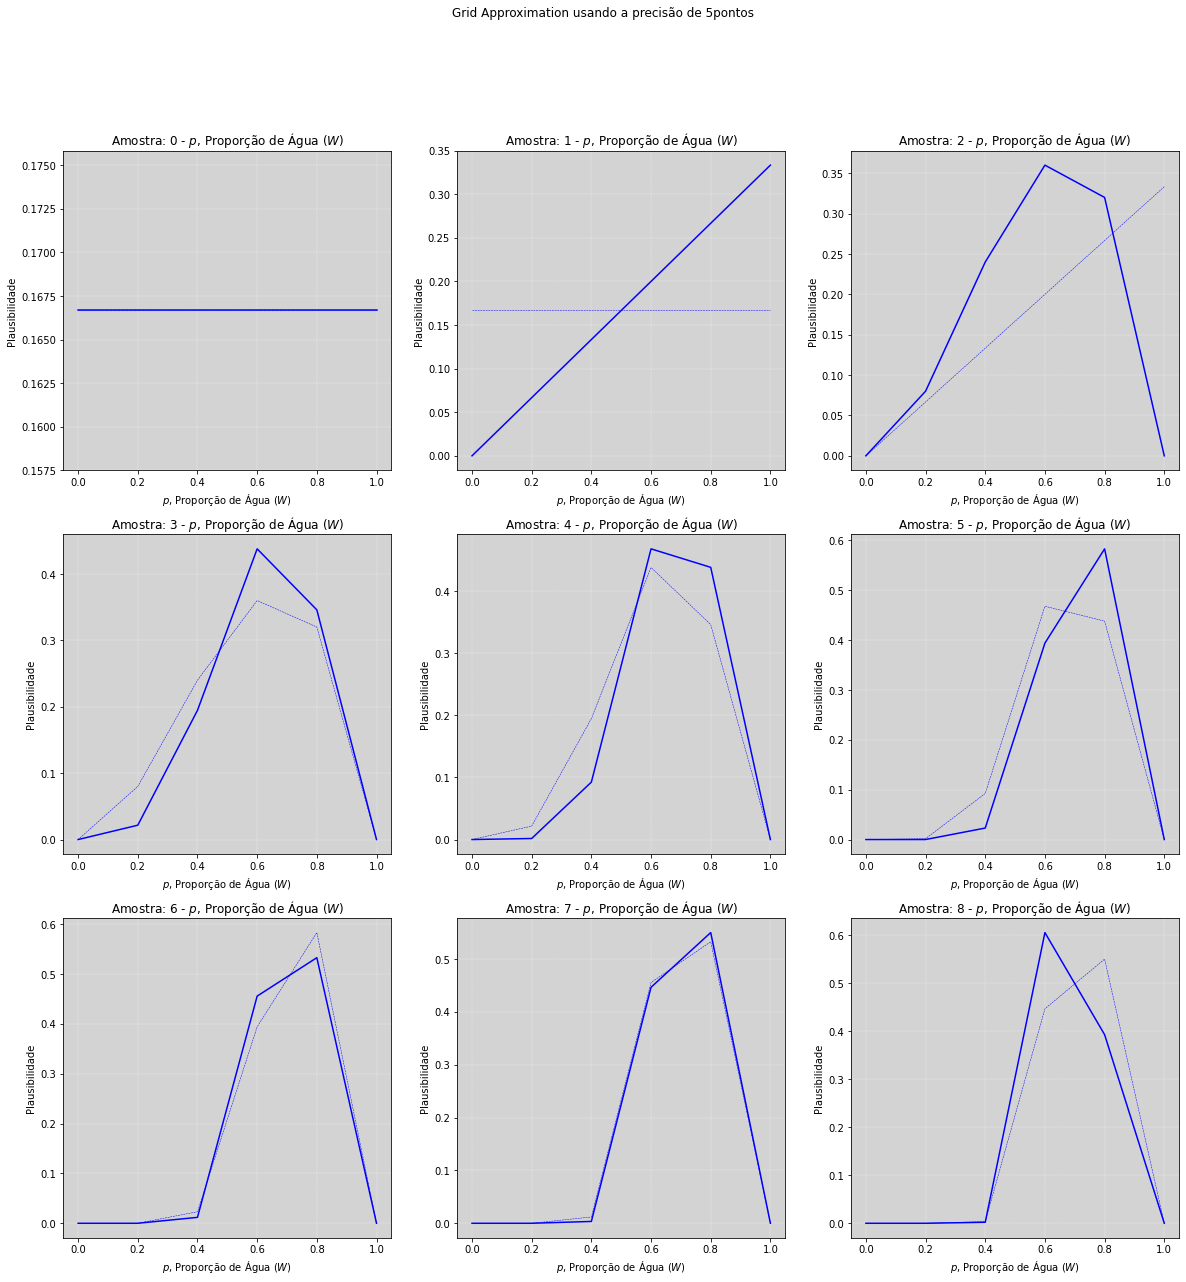

In [10]:
# Conforme o exemplo anterior, usamos o grid approximation para estimar a nossa posteriori, 
#   abaixo, temos a precisão do grid.
#
# Para precisão mais baixa, o gráfico tende a ficar mais 'pixelizado', e se torna mais 'contínuo' quando 
#  aumentamos a precisão, visualmente, precisões acima de 100 não gera gráficos melhores. 

# ========================================
#      Teste a diferença entre eles:       
# ========================================
# precisao_grid = 3                       
precisao_grid = 5                       
# precisao_grid = 10                        
# precisao_grid = 15 
# precisao_grid = 20 
# precisao_grid = 50 
# precisao_grid = 100 
# ========================================

# Gerando todas as hipóteses sobre a proporção de água sobre a superfície da Terra.
p_s = np.arange(0, 1 + 1/precisao_grid, 1/precisao_grid)  # precisao_grid é um ajuste para o vetor de p_s = [0, 1] 

# Construindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0, scale=1)  # uniforme(0, 1) 

# Amostra.
amostras = ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W']

# Transformando nossa amostra em valores numericos.
amostras_num = [1 if amostra == 'W' else 0 for amostra in amostras] 


# (Configurações técnicas para a plotagem dos gráficos).
_lado = int(np.round(np.sqrt(len(amostras))))

fig, ax = plt.subplots(_lado, _lado, figsize=(20, 20))  # Constrói um grade quadrada para alocar os gráficos gerados. 

posicao = [[i, j] for i in range(_lado) for j in range(_lado)]  # Gera todas as posicões da grade.

# Gerando uma posteriori para cada uma das hipóteses.
for n in range(len(amostras)):
    
    # Calculando a verosimilhança para todas nossas hipóteses de proporções de água para a primeira amostra.
    N = n  # É a variável que determina o tamanho da amostra que estamos utilizando no momento.

    verossimilhanca = stats.binom.pmf(np.sum(amostras_num[0: N]),  # Qtd de '1' na amostra.
                                        N,  # N é o número de amostras que estamos retirando.
                                        p=p_s)  # É o vetor de probabilidades, nossas hipóteses.

    posteriori = verossimilhanca * priori  # Calculando a posteriori.
    
    ax[posicao[N][0], posicao[N][1]].plot(p_s, priori / sum(priori), 
                                          color='blue', ls='--', linewidth=0.5)  # Plot da Priori

    ax[posicao[N][0], posicao[N][1]].plot(p_s, posteriori / sum(posteriori), 
                                          color='blue')  # Plot da Posteriori

    ax[posicao[N][0], posicao[N][1]].grid(ls='--', color="lightgray", axis="x")  # Insere uma grade com linhas verticais.
    
    ax[posicao[N][0], posicao[N][1]].set_title('Amostra: ' + str(N) + ' - $p$, Proporção de Água ($W$)')
    ax[posicao[N][0], posicao[N][1]].set_xlabel('$p$, Proporção de Água ($W$)')
    ax[posicao[N][0], posicao[N][1]].set_ylabel('Plausibilidade')    
    ax[posicao[N][0], posicao[N][1]].grid(color='white', linewidth='0.3', ls='--')
    priori = posteriori  # Posteriori se torna à priori para a análise seguinte.

    
    
fig.suptitle('Grid Approximation usando a precisão de ' + str(precisao_grid) + 'pontos')
    
plt.show()

### Amostras a partir da Posteriori

- Calcule ou aproxime a posteriori


- Faça uma amostragem com reposição da posteriori


- Calcular coisas com essa amostra

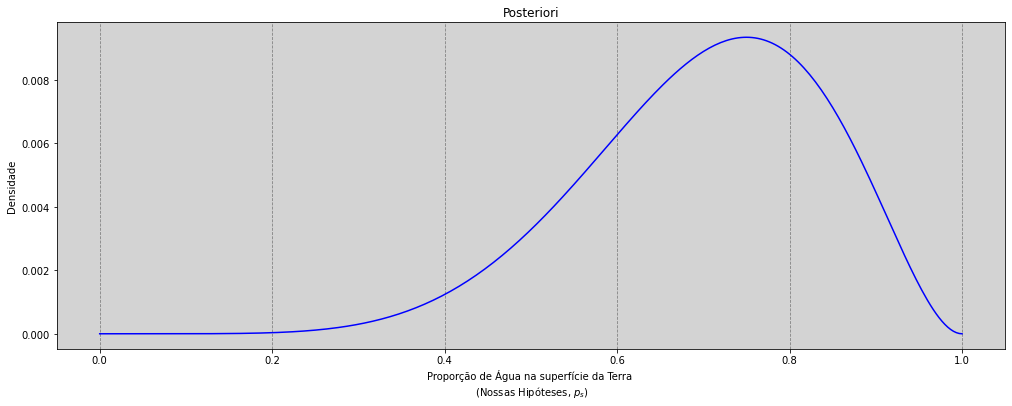

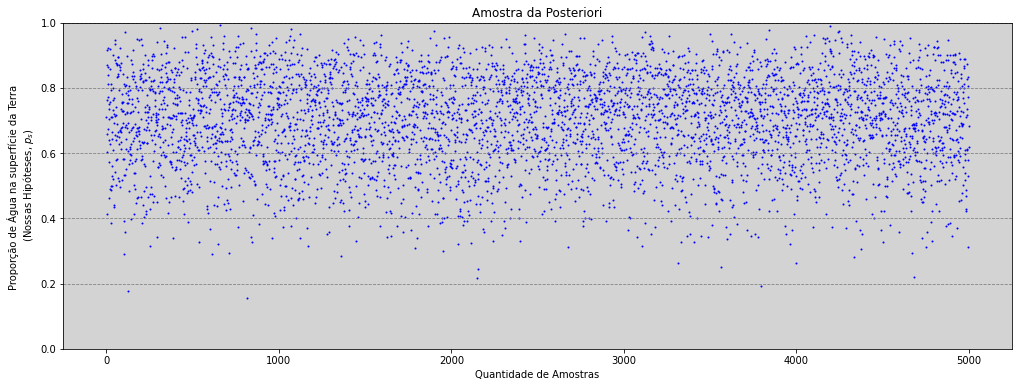

In [11]:
precisao_grid = 300  # Para melhorar o efeito do scatter plot

# Gerando todas as hipóteses sobre a proporção de água sobre a superfície da Terra.
p_s = np.arange(0, 1 + 1/precisao_grid, 1/precisao_grid)  # precisao_grid é um ajuste para o vetor de p_s = [0, 1] 

# Construindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0, scale=1)  # uniforme(0, 1) 

# Amostra.
amostras = ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W']

# Transformando nossa amostra em valores numericos.
amostras_num = [1 if amostra == 'W' else 0 for amostra in amostras] 

verossimilhanca = stats.binom.pmf(np.sum(amostras_num), N, p=p_s) 
posteriori = verossimilhanca * priori  # Calculando a posteriori.
posteriori = posteriori / sum(posteriori)  # Normalizando a posteriori

# Posteriori
plt.figure(figsize=(17, 6))
posteriori = posteriori / sum(posteriori)
plt.plot(p_s, posteriori, color='blue')  # Plot da Posteriori
plt.grid(axis='x', ls='--', color='gray')
plt.title('Posteriori')
plt.xlabel('Proporção de Água na superfície da Terra \n (Nossas Hipóteses, $p_s$)')
plt.ylabel('Densidade')
plt.show()

# Amostragem da posteriori
plt.figure(figsize=(17, 6)) 
amostra_posteriori = np.random.choice(p_s, size=5000, replace=True, p=posteriori)
plt.scatter(range(len(amostra_posteriori)), amostra_posteriori, color='blue', s=1)  # Plot da Amostra Posteriori
plt.grid(axis='y', ls='--', color='gray')
plt.ylim(0, 1)
plt.title('Amostra da Posteriori')
plt.xlabel('Quantidade de Amostras')
plt.ylabel('Proporção de Água na superfície da Terra \n (Nossas Hipóteses, $p_s$)')
plt.show()

#### Calculando coisas com a nossa amostra da Posteriori 

Resumindo as tarefas:

- Quanto da probabilidade a posteriori abaixo, acima ou entre valores específicos do parâmetro?


- Qual o valor do parâmetro que contém 50%, 80% ou 95% da probabilidade posteriori? *Intervalos de "Confiança"*


- Qual o parâmetro valor do parâmetro **maximizam** a probabilidade à posteriori? **Minimiza** a perda à posteriori? *Estimativa do pontos*


Nós que decidimos qual usar!

Existem, em estatística, basicamente dois tipos de intervalos: `Intervalo de Percentil` e `HPDI` (*Highest posterior density intervals* - O maior intervalo da densidade posteriori) 

**Intervalos de Percentil**: Áreas são em cada região (*bons para serem usados em distribuições simétricas*)

**HPDI**:O intervalo mais estreito possível que contém a massa de probabilidade.

---

O que precisamos saber é que o um intervalo é apenas um resumo, eles comprimem a informação, mas o que geralmente importa é o formato da posteriori, não há nada nos limites que geram o intervalos que tenha *propriedades mágicas*.  

In [12]:
precisao_grid = 300  # Para melhorar o efeito do scatter plot

# Gerando todas as hipóteses sobre a proporção de água sobre a superfície da Terra.
p_s = np.arange(0, 1 + 1/precisao_grid, 1/precisao_grid)  # precisao_grid é um ajuste para o vetor de p_s = [0, 1] 

# Construindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0, scale=1)  # uniforme(0, 1) 

# Amostra.
amostras = ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W']

# Transformando nossa amostra em valores numericos.
amostras_num = [1 if amostra == 'W' else 0 for amostra in amostras]

N = len(amostras)  # É a variável que determina o tamanho da amostra que estamos utilizando no momento.
verossimilhanca = stats.binom.pmf(np.sum(amostras_num), N, p=p_s) 
posteriori = verossimilhanca * priori  # Calculando a posteriori.
posteriori = posteriori / sum(posteriori)  # Normalizando a posteriori

In [13]:
# Função que retorna a quantidade de pontos proporcional dentre um range
def probability_posteriori(hipoteses, posteriori, param_sup, param_inf=False, qtd_amostra=1000, plot=True):
    
    # Calculando o tamanho da amostra da posteriori
    amostra = np.random.choice(p_s, size=qtd_amostra, replace=True, p=posteriori)
    
    # Quantidade de pontos da amostra da posteriori que são maiores do que o parâmetro_1 
    prob = amostra <= param_sup
    
    # Se o parâmetro inferiori foi passado.
    if param_inf and param_inf < param_sup:
        prob_param_inf = amostra >= param_inf
        prob = prob * prob_param_inf  # Juntando ambas contagens do param_1 e do param_2
        
    # Configurações do plot
    if plot:
        hipoteses_filtrado_superior = hipoteses <= param_sup  # Todas as hipóteses que são menores que param_sup
        
        # Se o parâmetro inferiori foi passado.
        if param_inf:
            hipoteses_filtrado_inferior = hipoteses >= param_inf
            posteriori_filtrada = posteriori * hipoteses_filtrado_superior * hipoteses_filtrado_inferior
            texto = ('Probabilidade da proporção de água (p) na superfície da Terra estar entre ' + str(param_inf) + ' e ' + str(param_sup) + ' é igual à ' + str(round(np.sum(prob) / len(amostra) * 100)) + '%, dado a amostra.')
        else:
            posteriori_filtrada = posteriori * hipoteses_filtrado_superior
            texto = ('Probabilidade da proporção de água (p) na superfície da Terra estar entre 0 e ' + str(param_sup) + ' é igual à ' + str(round(np.sum(prob) / len(amostra) * 100)) + '%, dado a amostra.')
             
        plt.figure(figsize=(17, 9))
        plt.plot(hipoteses, posteriori)  # Plot posteriori
        plt.fill_between(hipoteses, 0, posteriori_filtrada, alpha=0.5)
        
        plt.title('Probabilidade das hipóteses da superfície da Terra estar coberta por água')
        plt.xlabel('Hipóteses, $p_s$')
        plt.ylabel('Posteriori')
        plt.grid(axis='x', ls='--', color='gray')

        plt.show()
        
        print(texto)
        
    else:
        
        return np.sum(prob) / len(amostra)

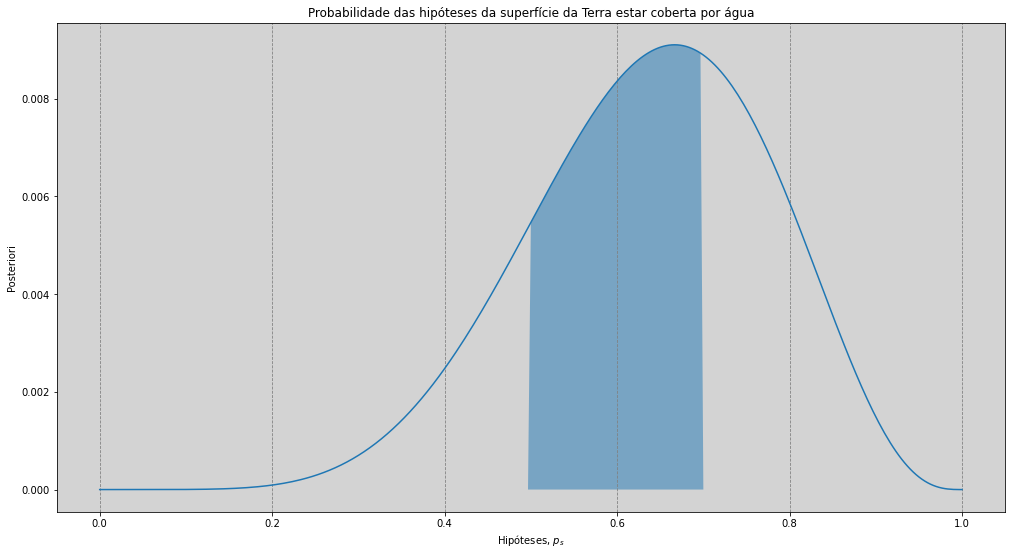

Probabilidade da proporção de água (p) na superfície da Terra estar entre 0.5 e 0.7 é igual à 46%, dado a amostra.


In [14]:
# Probabilidade da proporção da superfície de Terra estar entre parâmtros abaixo:

# =======================================================
#         Configure os p_s superiores e inferiores
#        -------------------------------------------
parametro_p_inferior = 0.5  # [0, 1] or False
parametro_p_superior = 0.7  # [0, 1]
# =======================================================

# Chamando a função probability_posteriori com plot=True
probability_posteriori(p_s, posteriori, param_inf=parametro_p_inferior, param_sup=parametro_p_superior)

Nós normalmente não usamos estimativas pontuais para tomar decisões.

- A posteriori inteira contém toda a informação


- O melhor ponto depende da proposta.


- A `média` quase sempre é mais sensível do que a `moda`.


#### Falando um pouco sobre intervalos

- **Intervalo de Confiança**:
    - Esse é um termo não bayesiano que nem sempre significa o que diz.
    
    
- **Intervalo de credibilidade**:
    - Não devemos acreditar nos na *credibilidade* a menos que acreditemos nos dados e no modelo.

#### Checagem da predição do modelo

- A probabilidade posteriori nunca é suficiente.


- Até os melhores modelos podem fazer predições terríveis.


- Nós também devemos sempre checar as suposições do modelo.


- **Checagem preditiva**: Podemos usar amostras da posteriori para analisar as observações da simuladas.

#### Vamos entender como fazer simulações a partir da posteriori

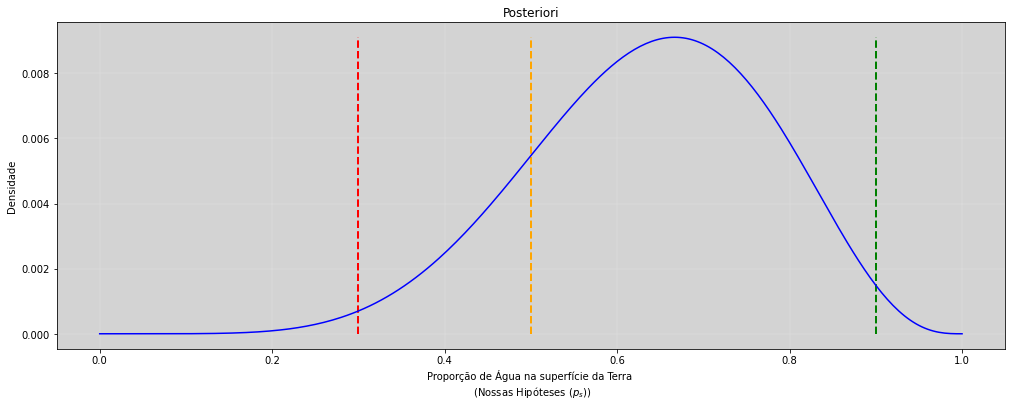

In [15]:
precisao_grid = 300  # Para melhorar o efeito do scatter plot

# Gerando todas as hipóteses sobre a proporção de água sobre a superfície da Terra.
p_s = np.arange(0, 1 + 1/precisao_grid, 1/precisao_grid)  # precisao_grid é um ajuste para o vetor de p_s = [0, 1] 

# Construindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0, scale=1)  # uniforme(0, 1) 

# Amostra.
amostras = ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W']

# Transformando nossa amostra em valores numericos.
amostras_num = [1 if amostra == 'W' else 0 for amostra in amostras]

N = len(amostras)  # É a variável que determina o tamanho da amostra que estamos utilizando no momento.
verossimilhanca = stats.binom.pmf(np.sum(amostras_num), N, p=p_s) 
posteriori = verossimilhanca * priori  # Calculando a posteriori.
posteriori = posteriori / sum(posteriori)  # Normalizando a posteriori

# Posteriori
plt.figure(figsize=(17, 6))
posteriori = posteriori / sum(posteriori)
plt.plot(p_s, posteriori, color='blue')  # Plot da Posteriori
plt.grid(color='white', linewidth='0.2', ls='--')

max_posteriori = max(posteriori) / 1  # Proposta de um tamanho da barra horizontal

# Plotando 3 pontos verticais
plt.vlines(0.3, 0, max_posteriori, color='red', ls='--', lw=2)  # Ponto 1
plt.vlines(0.5, 0, max_posteriori, color='orange', ls='--', lw=2)  # Ponto 2
plt.vlines(0.9, 0, max_posteriori, color='green', ls='--', lw=2)  # Ponto 3

plt.title('Posteriori')
plt.xlabel('Proporção de Água na superfície da Terra \n (Nossas Hipóteses ($p_s$))')
plt.ylabel('Densidade')
plt.show()

Nossas três "estimativas pontuais" de $p$ serão colocadas na distribuição binomial e iremos obter a forma da distribuição desse parâmetro, com $N=9$ elementos sorteados.  

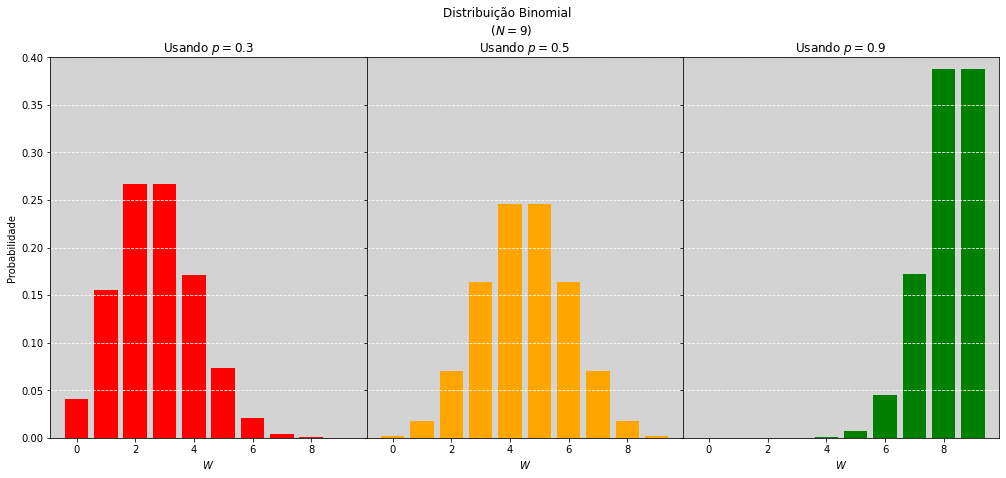

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 7))

ax1.bar(np.arange(0, 10), stats.binom.pmf(np.arange(0, 10), n=9, p=0.3), color='red')
ax1.set_title("Usando $p=0.3$")
ax1.set_ylabel("Probabilidade")
ax1.set_xlabel("$W$")
ax1.grid(axis='y', ls='--', color='white')
ax1.set_ylim(0, 0.4)

ax2.bar(np.arange(0, 10), stats.binom.pmf(np.arange(0, 10), n=9, p=0.5), color='orange')
ax2.set_title("Usando $p=0.5$")
ax2.set_xlabel("$W$")
ax2.grid(axis='y', ls='--', color='white')
ax2.set_ylim(0, 0.4)
ax2.set_yticklabels([])

ax3.bar(np.arange(0, 10), stats.binom.pmf(np.arange(0, 10), n=9, p=0.9), color='green')
ax3.set_title("Usando $p=0.9$")
ax3.set_xlabel("$W$")
ax3.grid(axis='y', ls='--', color='white')
ax3.set_ylim(0, 0.4)
ax3.set_yticklabels([])

fig.suptitle('Distribuição Binomial \n ($N=9$)')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

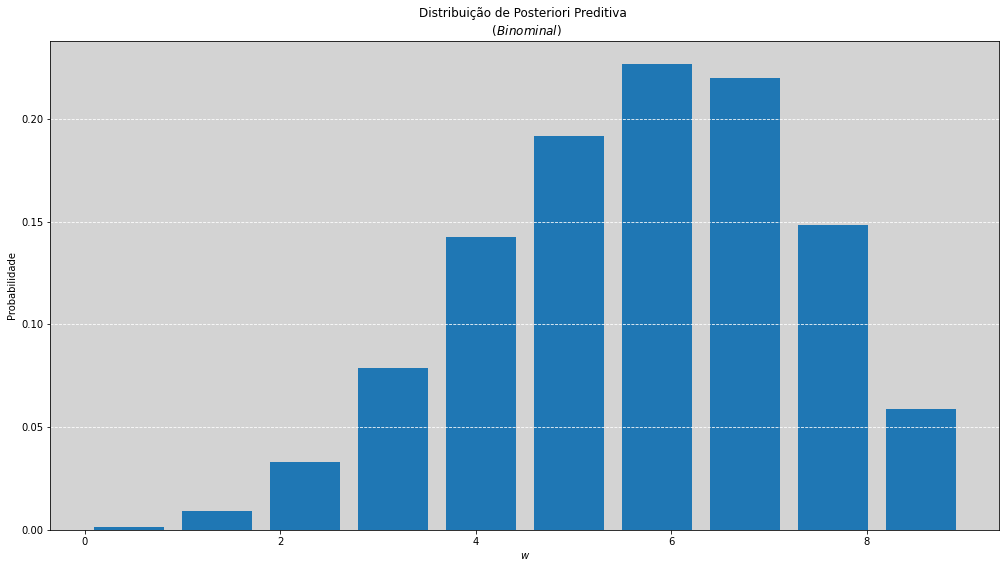

In [17]:
# Gerando a distribuição preditiva binomial com amostras de p da posteriori

precisao_grid = 300  # Para melhorar o efeito do scatter plot

# Gerando todas as hipóteses sobre a proporção de água sobre a superfície da Terra.
p_s = np.arange(0, 1 + 1/precisao_grid, 1/precisao_grid)  # precisao_grid é um ajuste para o vetor de p_s = [0, 1] 

# Construindo uma Priori.
priori = stats.uniform.pdf(p_s, loc=0, scale=1)  # uniforme(0, 1) 

# Amostra.
amostras = ['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W']

# Transformando nossa amostra em valores numericos.
amostras_num = [1 if amostra == 'W' else 0 for amostra in amostras]

N = len(amostras)  # É a variável que determina o tamanho da amostra que estamos utilizando no momento.
verossimilhanca = stats.binom.pmf(np.sum(amostras_num), N, p=p_s) 
posteriori = verossimilhanca * priori  # Calculando a posteriori.
posteriori = posteriori / sum(posteriori)  # Normalizando a posteriori

amostra = []
for i in range(100):
    p_amostrado = np.random.choice(p_s, size=1, replace=True, p=posteriori)
    amostra_binomial = stats.binom.rvs(n=9, p=p_amostrado, size=100)  # 100 amostras para cada p_amostrado
    amostra.append(amostra_binomial)
    
# Plot
plt.figure(figsize=(17,9))
plt.hist(np.ravel(amostra), density=True, rwidth=0.8, bins=10)

plt.grid(axis='y', ls='--', color='white')
plt.xlabel('$w$')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Posteriori Preditiva \n ($Binominal$)')
plt.show()